In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import pandas as pd  
import numpy as np
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("D:/UCI/tae.csv",names = [" native English speake"," Course instructor",
                                             "Course","  Summer or regular semester ",
                                               "Class size","Class attribute"])
data.drop(columns=["Class attribute"], inplace=True)
info = np.array(data)

In [4]:
from sklearn import preprocessing
import numpy as np
info_scaled = preprocessing.scale(info)
#标准化

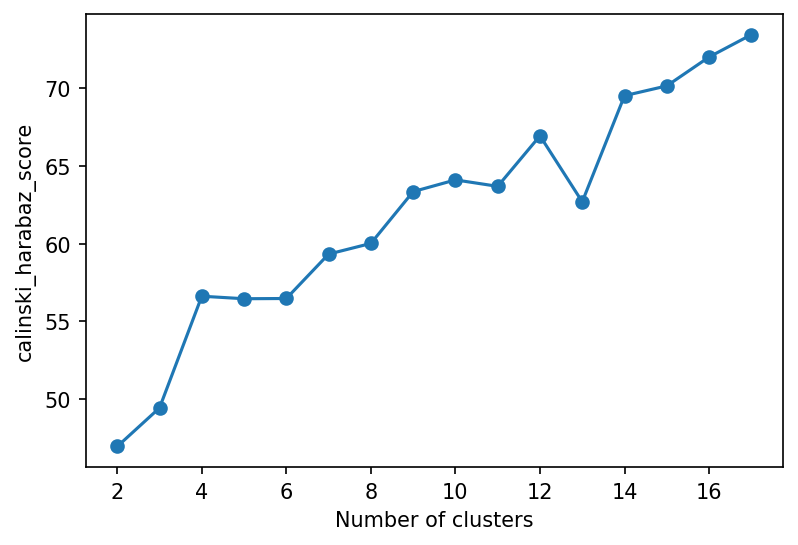

In [6]:
#Calinski-Harabaz Index 分数值ss越大则聚类效果越好。类别内部数据的协方差越小越好，类别之间的协方差越大越好
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = info_scaled
ch_scores = []
for i in range(2, 18):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)    
    km.fit(X)
    ch_scores.append(metrics.calinski_harabasz_score(X, km.labels_))
plt.figure(dpi=150)
plt.plot(range(2,18), ch_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabaz_score')
plt.show()

Text(0.5, 1.0, 'Tsne')

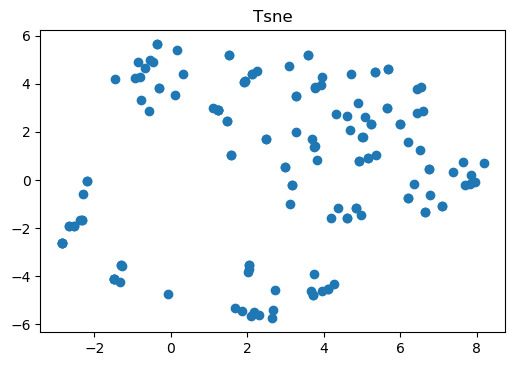

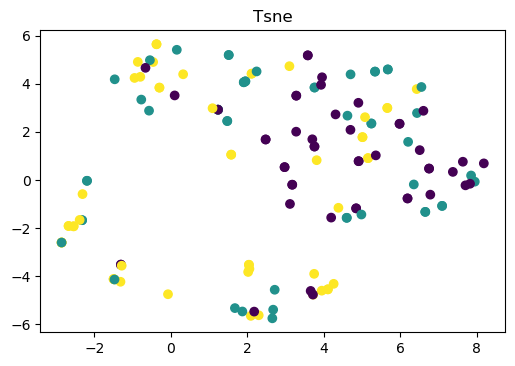

In [11]:
data = pd.read_csv("D:/UCI/tae.csv",names = [" native English speake"," Course instructor",
                                             "Course","  Summer or regular semester ",
                                               "Class size","Class attribute"])
info = np.array(data)
X = info
data_target = X[:,-1]
data = X[:,0:5]
from sklearn import preprocessing
import numpy as np
info_scaled = preprocessing.scale(data)
#标准化
tsne = TSNE(n_components=2,learning_rate = 100,perplexity = 50,random_state=1)
tsne.fit_transform(info_scaled )
data_tsne = tsne.fit_transform(info_scaled )
plt.figure( dpi=100)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1],alpha = 1)
plt.title('Tsne')
plt.figure( dpi=100)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data_target,alpha = 1)
plt.title('Tsne')
#tsne可视化（真实分类）